# BikeMaps.Org Data for Victoria, BC

# Abstract

# Introduction 

# Methods

# Results

# Discussion

# Conclusion

## Data Exploration

In [78]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import pysal
import pysal.spatial_dynamics.interaction as interaction
np.random.seed(100)
import datetime


from IPython.display import IFrame, Image, HTML, display, YouTubeVideo
%config InlineBackend.figure_format = 'svg'
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns  # Makes for nicer plots
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8, 4
from matplotlib.patches import Ellipse, Circle
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import mpl_toolkits.mplot3d.art3d as art3d
from mpl_toolkits.mplot3d import proj3d
from ipywidgets import interact, interactive, fixed


## Collisions Data Set

In [3]:
collisions = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/col.csv')
collisions.dtypes

i_type               object
incident_with        object
date                 object
p_type               object
details              object
incident_effect      object
injury               object
trip_purpose         object
regular_cyclist      object
helmet               object
intoxicated          object
road_conditions      object
sightlines           object
cars_on_roadside     object
riding_on            object
bike_lights          object
terrain              object
direction            object
turning              object
age                 float64
birthmonth          float64
sex                  object
pk                    int64
x                   float64
y                   float64
dtype: object

In [4]:
theft = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/theft.csv')
theft.head()

,i_type,date,p_type,details,how_locked,lock,locked_to,lighting,traffic,police_report,police_report_num,insurance_claim,insurance_claim_num,regular_cyclist,pk,longitude,latitude
0,Minor bike component,2015-06-29T19:30:00,theft,Quick release removed from back wheel - i.e. i...,Frame and tire locked,U-Lock,Good,NaN,Medium,True,T15000455,False,NaN,Y,1253,-123.386807,48.437529
1,Bike (value < $1000),2015-07-28T02:00:00,theft,Bike stolen from under the Petch Building bree...,Frame locked,Cable lock,Moderate,NaN,Very Low,True,NaN,False,NaN,Y,1421,-123.310697,48.461660
2,Minor bike component,2015-07-24T21:30:00,theft,Bike helmet stolen. It was not locked.,Frame and tire locked,Cable lock,Moderate,NaN,High,False,NaN,False,NaN,Y,1493,-123.364642,48.427851
3,Bike (value < $1000),2015-04-17T21:00:00,theft,parked at work inside locked bike cage room. D...,Not locked,NaN,Moderate,NaN,Very Low,True,NaN,False,NaN,Y,1614,-123.361670,48.426880
4,Bike (value < $1000),2015-02-03T17:30:00,theft,"This was an unfortunate situation where I ""loc...",Not locked,NaN,Good,NaN,Low,True,NaN,False,NaN,Y,1636,-123.378739,48.440147


In [34]:
#hazards = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/hazards.csv')

In [5]:
near_miss = pd.read_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/near_miss.csv')

In [6]:
date = collisions['date']


def changetime(x):
    t1 = pd.to_datetime(x, format ='%Y-%m-%dT%H:%M:%S')
    #t2 = pd.Timestamp(np.datetime64(t1))
    t3 = t1.to_pydatetime()
    return t3

                               
collisions['T_test3'] = collisions['date'].apply(changetime)

collisions['T_test3']

collisions['just_date'] = collisions['T_test3'].dt.date

collisions.head()


,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helmet,...,direction,turning,age,birthmonth,sex,pk,x,y,T_test3,just_date
0,Collision with moving object or vehicle,"Vehicle, angle",2014-12-04T22:30:00,collision,Cab pulled an illegal u-turn and I collided wi...,NaN,No injury,Social reason,Y,Y,...,E,Heading straight,NaN,NaN,M,1090,-123.343377,48.434454,2014-12-04 22:30:00,2014-12-04
1,Collision with moving object or vehicle,"Vehicle, side",2015-07-28T10:30:00,collision,Vehicle turned left into my lane. I was unable...,NaN,"Injury, hospital emergency visit",Exercise or recreation,Y,Y,...,NW,Heading straight,1941,5,M,1427,-123.418093,48.621903,2015-07-28 10:30:00,2015-07-28
2,Collision with moving object or vehicle,"Vehicle, head on",2015-06-02T17:20:00,collision,I attended an head on accident between two mal...,NaN,"Injury, hospitalized",Exercise or recreation,NaN,NaN,...,NaN,Turning left,NaN,NaN,NaN,1510,-123.398636,48.592406,2015-06-02 17:20:00,2015-06-02
3,Collision with moving object or vehicle,Another cyclist,2015-05-06T09:00:00,collision,I was traveling south on Borden crossing McKen...,NaN,"Injury, no treatment",Commute,Y,Y,...,SW,Turning right,1958,7,M,917,-123.361423,48.470311,2015-05-06 09:00:00,2015-05-06
4,Fall,Train Tracks,2015-05-30T17:30:00,collision,Riding up the hill and my wheel caught in the ...,NaN,"Injury, no treatment",Commute,Y,Y,...,I don't know,Heading straight,1955,4,F,1052,-123.475707,48.447650,2015-05-30 17:30:00,2015-05-30


In [41]:
ordered_c = collisions.sort_values(by = 'T_test3') 

ordered_c.reset_index(inplace=True)

def time_diff(x):
    timesince = x - ordered_c['T_test3'][0] 
    return int(timesince.total_seconds() / 36000) #min since first crash #change to hours since first crash

#want resolution in time to be similar to the resolution in space 

# time_diff(ordered_c['T_test3'][0])

ordered_c['hrs_since_firstcrash'] = ordered_c['T_test3'].apply(time_diff)

ordered_c.head()

,index,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,...,turning,age,birthmonth,sex,pk,x,y,T_test3,just_date,hrs_since_firstcrash
0,56,Collision with moving object or vehicle,"Vehicle, angle",2004-10-14T16:30:00,collision,Vehicle was turning right from McKenzie (west ...,NaN,No injury,Commute,Y,...,Heading straight,1980,NaN,M,62,-123.319393,48.468653,2004-10-14 16:30:00,2004-10-14,0
1,57,Collision with moving object or vehicle,"Vehicle, side",2005-05-11T17:00:00,collision,This is a crazy intersection. The driver veere...,NaN,No injury,Commute,Y,...,Heading straight,1980,NaN,M,63,-123.359427,48.455830,2005-05-11 17:00:00,2005-05-11,501
2,59,Collision with moving object or vehicle,"Vehicle, side",2005-05-15T12:25:00,collision,Car ran a red light,NaN,"Injury, hospital emergency visit",Personal business,Y,...,Heading straight,NaN,NaN,NaN,72,-123.358612,48.430752,2005-05-15 12:25:00,2005-05-15,510
3,75,Collision with moving object or vehicle,"Vehicle, side",2006-04-27T08:25:00,collision,the car ran the stop sign and hit my front whe...,NaN,"Injury, saw family doctor",Commute,Y,...,Heading straight,1952,8,F,120,-123.324838,48.439536,2006-04-27 08:25:00,2006-04-27,1343
4,83,Fall,Roadway,2006-07-05T15:00:00,collision,"As I was braking for the stop sign ahead, my t...",NaN,"Injury, no treatment",Commute,Y,...,Heading straight,1960,7,F,173,-123.349536,48.411378,2006-07-05 15:00:00,2006-07-05,1509


In [35]:
ordered_c.head(20)

,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helmet,...,direction,turning,age,birthmonth,sex,pk,x,y,T_test3,just_date
56,Collision with moving object or vehicle,"Vehicle, angle",2004-10-14T16:30:00,collision,Vehicle was turning right from McKenzie (west ...,NaN,No injury,Commute,Y,Y,...,W,Heading straight,1980,NaN,M,62,-123.319393,48.468653,2004-10-14 16:30:00,2004-10-14
57,Collision with moving object or vehicle,"Vehicle, side",2005-05-11T17:00:00,collision,This is a crazy intersection. The driver veere...,NaN,No injury,Commute,Y,Y,...,S,Heading straight,1980,NaN,M,63,-123.359427,48.455830,2005-05-11 17:00:00,2005-05-11
59,Collision with moving object or vehicle,"Vehicle, side",2005-05-15T12:25:00,collision,Car ran a red light,NaN,"Injury, hospital emergency visit",Personal business,Y,Y,...,E,Heading straight,NaN,NaN,NaN,72,-123.358612,48.430752,2005-05-15 12:25:00,2005-05-15
75,Collision with moving object or vehicle,"Vehicle, side",2006-04-27T08:25:00,collision,the car ran the stop sign and hit my front whe...,NaN,"Injury, saw family doctor",Commute,Y,Y,...,N,Heading straight,1952,8,F,120,-123.324838,48.439536,2006-04-27 08:25:00,2006-04-27
83,Fall,Roadway,2006-07-05T15:00:00,collision,"As I was braking for the stop sign ahead, my t...",NaN,"Injury, no treatment",Commute,Y,Y,...,W,Heading straight,1960,7,F,173,-123.349536,48.411378,2006-07-05 15:00:00,2006-07-05
82,Collision with stationary object or vehicle,"Vehicle, open door",2006-08-25T16:30:00,collision,The car stopped and passenger door opened in m...,NaN,No injury,Commute,Y,Y,...,S,Heading straight,1950,1,M,168,-123.368644,48.421689,2006-08-25 16:30:00,2006-08-25
104,Collision with moving object or vehicle,"Vehicle, side",2009-02-10T14:00:00,collision,"Car passed on left, and then turned into mall ...",NaN,No injury,Commute,Y,Y,...,N,Heading straight,1983,5,M,391,-123.332841,48.458711,2009-02-10 14:00:00,2009-02-10
87,Collision with moving object or vehicle,Another cyclist,2009-07-08T18:30:00,collision,NaN,NaN,"Injury, no treatment",Commute,Y,Y,...,NE,Heading straight,1959,NaN,M,211,-123.367665,48.463429,2009-07-08 18:30:00,2009-07-08
85,Collision with moving object or vehicle,"Vehicle, side",2010-05-05T15:15:00,collision,Car tried to pass me on the left. Hit my handl...,NaN,"Injury, no treatment",Commute,Y,Y,...,W,Turning right,1959,NaN,M,209,-123.361411,48.427743,2010-05-05 15:15:00,2010-05-05
79,Collision with moving object or vehicle,"Vehicle, head on",2010-12-11T18:45:00,collision,Poorly marked 3-way stop at a 4-way intersecti...,NaN,"Injury, saw family doctor",Social reason,Y,Y,...,I don't know,Turning left,1987,11,M,139,-123.394961,48.455470,2010-12-11 18:45:00,2010-12-11


In [38]:
#from shapely.geometry import Point
#collisions['geometry'] = collisions.apply(lambda x: Point((float(x.x), float(x.y))), axis=1)

#import geopandas
#gp_collisions = geopandas.GeoDataFrame(collisions, geometry='geometry')

#gp_collisions.head()

#gp_collisions.to_file('collisions_2.shp', driver='ESRI Shapefile')

In [9]:
# need to re-do with the hours 

collisions3 = ordered_c[['x', 'y', 'seconds']]

collisions3.head()

collisions3.to_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/xytime_collisions.csv')

In [10]:
path = "/anaconda/lib/python3.5/site-packages/pysal/examples/burkitt/burkitt.shp" 

#hacking work around- re-named my data to match the example data in PySAL examples folder 

In [11]:
#Modified Knox Test 

events = interaction.SpaceTimeEvents(path, 'seconds')
events.n

events.space[0]

events.t[0] #time not in the rigth formatt- must be in Python datetime 
events.t[1] - events.t[0]


result = interaction.modified_knox(events.space, events.t,delta=20,tau=5,permutations=99)

print("%2.8f"%result['stat'])


0.00000000


In [12]:
 print(result['stat'])

0.0


In [13]:
#Knox Test
result = interaction.knox(events.space, events.t ,delta=50,tau=500,permutations=99)
print(result['stat'])

print("%2.2f"%result['pvalue']) #can reject null hypothesis that there was no interaction in space and time

3
0.01


In [14]:
#Mantel Test

mt = interaction.mantel(events.space, events.t,99,scon=0.0,spow=1.0,tcon=0.0,tpow=1.0)
print("%6.6f"%mt['stat'])

print("%2.2f"%result['pvalue'])

//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)


0.010342
0.01


In [150]:
result_j = interaction.jacquez(events.space, events.t ,k=3,permutations=99)

print(result_j['stat'])

print("%3.1f"%result_j['pvalue'])

15
0.1


# Near Miss Data Set Pysal Analaysis 

In [15]:
near_miss['datetime'] = near_miss['date'].apply(changetime)
near_miss['seconds'] = near_miss['datetime'].apply(seconds)

near_miss.head()

,i_type,incident_with,date,p_type,details,incident_effect,injury,trip_purpose,regular_cyclist,helemt,...,direction,turning,age,birthmonth,sex,pk,longitude,latitude,datetime,seconds
0,Near collision with moving object or vehicle,"Vehicle, head on",2014-10-08T17:00:00,nearmiss,Vehicle was turning left onto Shelbourne from ...,NaN,No injury,Commute,Y,Y,...,W,Heading straight,1990,6,F,940,-123.333700,48.436077,2014-10-08 17:00:00,1412809200
1,Near collision with moving object or vehicle,"Vehicle, rear end",2015-05-27T17:05:00,nearmiss,"Biking along, car was passing me, realized the...",NaN,No injury,During work,Y,Y,...,W,Heading straight,1982,8,M,1011,-123.334365,48.416741,2015-05-27 17:05:00,1432767900
2,Near collision with moving object or vehicle,"Vehicle, side",2015-08-06T09:30:00,nearmiss,My children and I were walking our bikes acros...,NaN,No injury,Personal business,Y,Y,...,E,Heading straight,1975,4,F,1472,-123.315901,48.426492,2015-08-06 09:30:00,1438875000
3,Near collision with moving object or vehicle,"Vehicle, angle",2015-09-11T17:10:00,nearmiss,After pushing the crosswalk button a grey truc...,NaN,No injury,Commute,Y,Y,...,NE,Heading straight,1990,7,F,1581,-123.367893,48.463314,2015-09-11 17:10:00,1442013000
4,Near collision with moving object or vehicle,"Vehicle, side",2015-09-02T09:30:00,nearmiss,car cut in front of me in order to turn left. ...,NaN,No injury,Commute,NaN,NaN,...,E,Heading straight,NaN,NaN,NaN,1606,-123.344364,48.448219,2015-09-02 09:30:00,1441207800


In [16]:
near_miss.to_csv('/Users/marthamorrissey/Documents/STA_project_MM/Data/near_miss2_collisions.csv')

In [17]:
path_nm = "/anaconda/lib/python3.5/site-packages/pysal/examples/Line/Line.shp" 

In [18]:
events_nm = interaction.SpaceTimeEvents(path_nm, 'seconds')
events_nm.n

events_nm.t[1] - events_nm.t[0]

array([19958700])

In [20]:
#Knox Test 
result_nm = interaction.knox(events_nm.space, events_nm.t ,delta=50,tau=500,permutations=99)
print(result_nm['stat'])

print("%2.2f"%result_nm['pvalue'])

23
0.01


In [21]:
#Mantel Test

mt_nm = interaction.mantel(events_nm.space, events_nm.t,99,scon=0.0,spow=1.0,tcon=0.0,tpow=1.0)
print("%6.6f"%mt_nm['stat'])

print("%2.2f"%result_nm['pvalue'])

//anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:48: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getattr(asarray(obj), method)(*args, **kwds)


-0.016940
0.01


In [22]:
#Jacquez Test Near Misses 
result_j_nm = interaction.jacquez(events_nm.space, events_nm.t ,k=3,permutations=99)

print(result_j_nm['stat'])

print("%3.1f"%result_j_nm['pvalue'])

6
0.8


# Visualizations wth PyClust by these only account for Space

In [23]:
import scipy
import treelib
import pyclust
from scipy.spatial.distance import squareform, pdist

collisions_matrix_df = collisions[['x', 'y']]


collisions_matrix_df.insert(0, 'Crash_ID', range(0, 0 + len(collisions_matrix_df)))

collisions_matrix_df
    
x = pd.DataFrame(squareform(pdist(collisions_matrix_df.ix[:, 1:])), columns=collisions_matrix_df.Crash_ID.unique(), index=collisions_matrix_df.Crash_ID.unique())


#collisions_matrix_df['crash_site']

In [ ]:
#pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

In [24]:
def plot_scatter(X, labels=None, title="Scatter Plot"):
    
    labels = np.zeros(shape=X.shape[0], dtype=int) if labels is None else labels
    colors = ['b', 'r', 'g', 'm', 'y']
    col_dict = {}
    i = 0
    for lab in np.unique(labels):
        col_dict[lab] = colors[i]
        i += 1 
    
    fig1 = plt.figure(1, figsize=(8,6))
    ax = fig1.add_subplot(1, 1, 1)

    for i in np.unique(labels):
        indx = np.where(labels == i)[0]
        plt.scatter(X[indx,0], X[indx,1], color=col_dict[i], marker='o', s=100, alpha=0.5)

    plt.setp(ax.get_xticklabels(), rotation='horizontal', fontsize=16)
    plt.setp(ax.get_yticklabels(), rotation='vertical', fontsize=16)

    plt.xlabel('$x_1$', size=20)
    plt.ylabel('$x_2$', size=20)
    plt.title(title, size=20)

    plt.show()

[[ 0.03027187  0.19212526]
 [ 0.19261666  0.02913908]
 [ 0.09974725  0.16755994]]


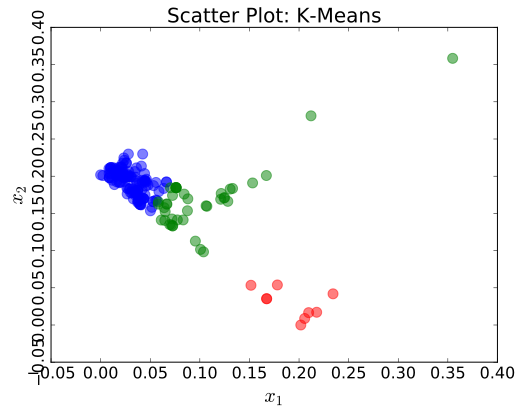

In [25]:
km = pyclust.KMeans(n_clusters=3)

km.fit(x.iloc[:,0:2].values)

print(km.centers_)

plot_scatter(x.iloc[:,0:2].values, labels=km.labels_, title="Scatter Plot: K-Means")

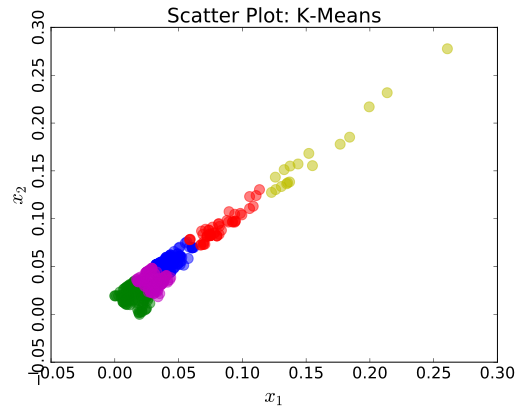

In [26]:
# near miss K-means clustering visualization 

nm_matrix_df = near_miss[['longitude', 'latitude']]

nm_matrix_df.insert(0, 'Crash_ID', range(0, 0 + len(nm_matrix_df)))

#nm_matrix_df.head()

nm_matrix = pd.DataFrame(squareform(pdist(nm_matrix_df.ix[:, 1:])), columns=nm_matrix_df.Crash_ID.unique(), index=nm_matrix_df.Crash_ID.unique())

km_nm = pyclust.KMeans(n_clusters=5)

km_nm.fit(nm_matrix.iloc[:,0:2].values)

#print(km_nm.centers_)

plot_scatter(nm_matrix.iloc[:,0:2].values, labels=km_nm.labels_, title="Scatter Plot: K-Means")


# Distance Accounting for Space and Time

In [70]:
c_st = ordered_c[['x', 'y' , 'hrs_since_firstcrash']]

c_st.head()

#cut_points = []
#x = pd.qcut(c_st['x'], 10)

c_st['x_binned'] = pd.cut(c_st['x'], bins = 10, labels=[1,2,3, 4, 5, 6, 7, 8 , 9, 10])
c_st['y_binned'] = pd.cut(c_st['y'],  bins = 10, labels=[1,2,3, 4, 5, 6, 7, 8 , 9, 10])
c_st['time_binned'] = pd.cut(c_st['hrs_since_firstcrash'], bins = 20, labels = np.arange(20))

c_st.head()


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

,x,y,hrs_since_firstcrash,x_binned,y_binned,time_binned
0,-123.319393,48.468653,0,10,4,0
1,-123.359427,48.455830,501,9,3,0
2,-123.358612,48.430752,510,9,3,0
3,-123.324838,48.439536,1343,10,3,2
4,-123.349536,48.411378,1509,9,2,2


In [61]:
scaled_st = c_st[['x_binned', 'y_binned', 'time_binned']]
st_matrix = scaled_st.as_matrix()

In [68]:
import scipy
import sklearn
from sklearn.cluster import KMeans

In [64]:
y = pdist(st_matrix, 'euclidean')

print(y) #space-time distance

[ 1.41421356  1.41421356  2.23606798 ...,  2.23606798  1.          2.        ]


In [69]:
KMeans(n_clusters=3 ).fit_predict(st_matrix)

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

## Where is Binned Space and Regular Space?

### Visualization based on code from Carson's STA Lecture 4. 

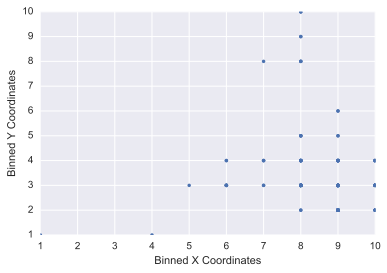

In [80]:
#np.array(c_st['x_binned'])

ax = plt.figure(figsize=(6, 4)).gca()
#ax.plot(events.space[:, 0], events.space[:, 1], ".")

ax.plot(np.array(c_st['x_binned']), np.array(c_st['y_binned']), ".")


ax.set_xlabel("Binned X Coordinates")
ax.set_ylabel("Binned Y Coordinates")
plt.show()

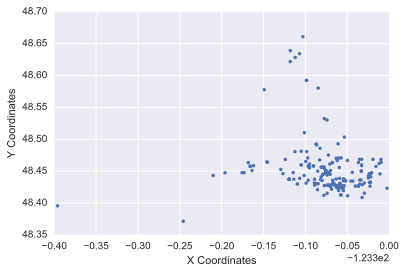

In [85]:
#np.array(c_st['x_binned'])

ax = plt.figure(figsize=(6, 4)).gca()
#ax.plot(events.space[:, 0], events.space[:, 1], ".")

ax.plot(np.array(c_st['x']), np.array(c_st['y']), ".")


ax.set_xlabel("X Coordinates")
ax.set_ylabel("Y Coordinates")
plt.show()

## Where in Binned Time and Regular Time?

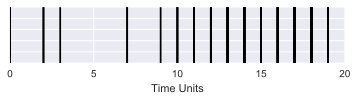

In [88]:
ax = plt.figure(figsize=(6, 1)).gca()
ax.vlines(np.array(c_st['time_binned']), 0, 1)
ax.set_xlabel("Time Units")
plt.tick_params(axis='y', which='both', labelleft='off') 
plt.show()

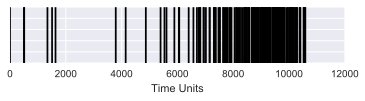

In [89]:
ax = plt.figure(figsize=(6, 1)).gca()
ax.vlines(np.array(c_st['hrs_since_firstcrash']), 0, 1)
ax.set_xlabel("Time Units")
plt.tick_params(axis='y', which='both', labelleft='off') 
plt.show()

## Where in Binned Space-Time and Regular Space-Time?

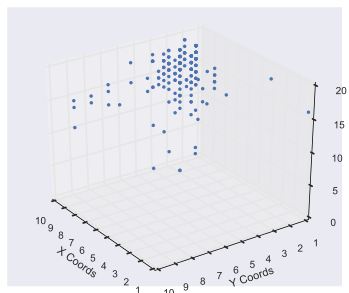

In [84]:
@interact(angle=(0, 240, 5))
def make_plot(angle):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)  # Use 'angle' parameter
    ax.set_ylabel("Y Coords")
    ax.set_xlabel("X Coords")
    ax.set_zlabel("Time Units")
    ax.plot((np.array(c_st['x_binned'])), np.array(c_st['y_binned']), np.array(c_st['time_binned']), ".")
    plt.show()

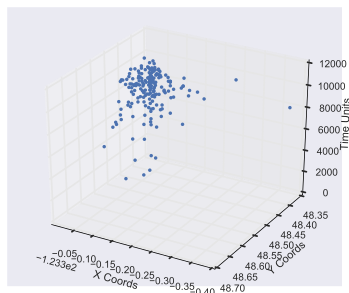

In [90]:
@interact(angle=(0, 240, 5))  
def make_plot(angle):
    fig = plt.figure(figsize=(6, 5))
    ax = fig.gca(projection='3d')
    ax.view_init(30, angle)  # Use 'angle' parameter
    ax.set_ylabel("Y Coords")
    ax.set_xlabel("X Coords")
    ax.set_zlabel("Time Units")
    ax.plot((np.array(c_st['x'])), np.array(c_st['y']), np.array(c_st['hrs_since_firstcrash']), ".")
    plt.show()